# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [46]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [47]:
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [48]:
# version using iloc
# heroes_df = heroes_df.iloc[:,range(1,len(heroes_df.columns))]

if 'Unnamed: 0' in heroes_df: heroes_df = heroes_df.drop(columns=['Unnamed: 0'])

heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [49]:
dfs = [powers_df,heroes_df]

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [50]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


-99 is used as a missing value.

In [51]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Silk Spectre,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [52]:
[print(df.info(),"\n") for df in dfs]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None 



[None, None]

In [53]:
heroes_df.Publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
Shueisha               4
Icon Comics            4
IDW Publishing         4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Titan Books            1
South Park             1
J. R. R. Tolkien       1
Universal Studios      1
Hanna-Barbera          1
J. K. Rowling          1
Microsoft              1
Rebellion              1
Name: Publisher, dtype: int64

## Dealing with Duplicates

In [54]:
heroes_df[heroes_df.duplicated(keep=False)].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [55]:
heroes_df = heroes_df.drop_duplicates()

In [56]:
heroes_df[heroes_df.name.duplicated(keep=False)].sort_values(by='name')

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [57]:
heroes_df[heroes_df.name == 'Angel']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0


In [58]:
powers_df[powers_df.duplicated()].head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [59]:
powers_df[powers_df.hero_names.duplicated()].head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [60]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [61]:
heroes_df[heroes_df.Publisher.isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [62]:
heroes_df[heroes_df.Weight.isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [63]:
# Let's see if any of these hero names without publishers show up in powers_df

powers_df[powers_df.hero_names.isin(heroes_df[heroes_df.Publisher.isna()].name)]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
43,Astro Boy,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
77,Bionic Woman,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
123,Brundlefly,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
156,Chuck Norris,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
220,Ethan Hunt,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
238,Flash Gordon,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
258,Godzilla,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
319,Jason Bourne,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
341,Katniss Everdeen,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
348,King Kong,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
# Okay, they are, so how about we set the publisher to 'Unknown'

# This works but throws an error:
# heroes_df.loc[heroes_df.Publisher.isna(),'Publisher'] = 'Unknown'

# This is better code:
heroes_df = heroes_df.fillna({'Publisher':'Unknown'})
heroes_df.Publisher.value_counts()

Marvel Comics        387
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Unknown               15
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Icon Comics            4
Shueisha               4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Microsoft              1
Hanna-Barbera          1
J. K. Rowling          1
Rebellion              1
Universal Studios      1
J. R. R. Tolkien       1
South Park             1
Titan Books            1
Name: Publisher, dtype: int64

The -99 values should be NaN.

In [65]:
heroes_df = heroes_df.replace(-99,np.nan)

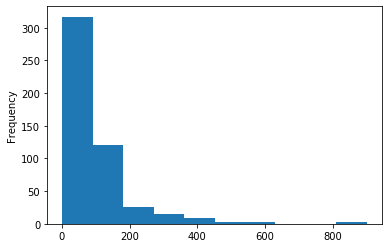

In [66]:
heroes_df.Weight.plot.hist()

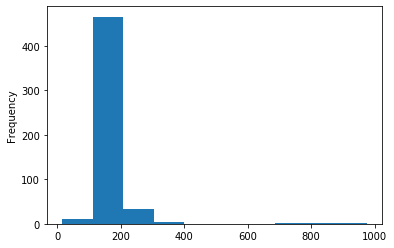

In [67]:
heroes_df.Height.plot.hist()

In [68]:
heroes_df[heroes_df.isna().any(axis=1)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,NaN
6,Adam Monroe,Male,blue,-,Blond,NaN,NBC - Heroes,-,good,NaN
14,Alex Mercer,Male,-,Human,-,NaN,Wildstorm,-,bad,NaN
15,Alex Woolsly,Male,-,-,-,NaN,NBC - Heroes,-,good,NaN
18,Allan Quatermain,Male,-,-,-,NaN,Wildstorm,-,good,NaN
21,Ando Masahashi,Male,-,-,-,NaN,NBC - Heroes,-,good,NaN
23,Angel,Male,-,Vampire,-,NaN,Dark Horse Comics,-,good,NaN
26,Angela,Female,-,-,-,NaN,Image Comics,-,bad,NaN
31,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,NaN
32,Anti-Spawn,Male,-,-,-,NaN,Image Comics,-,bad,NaN


In [69]:
heroes_df.groupby('Gender').Height.mean()

Gender
-         177.066667
Female    174.684028
Male      191.974860
Name: Height, dtype: float64

In [70]:
heroes_df.Gender.value_counts()

Male      504
Female    200
-          29
Name: Gender, dtype: int64

In [71]:
heroes_df[heroes_df.Gender == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,Bird-Brain,-,-,-,-,NaN,Marvel Comics,-,good,NaN
112,Blaquesmith,-,black,-,No Hair,NaN,Marvel Comics,-,good,NaN
133,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0
134,Box IV,-,brown,-,Brown / Black,NaN,Marvel Comics,-,good,NaN
160,Captain Universe,-,-,God / Eternal,-,NaN,Marvel Comics,-,good,NaN
165,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,-,good,62.0
178,Clea,-,-,-,White,NaN,Marvel Comics,-,good,NaN
196,Cypher,-,blue,-,Blond,175.0,Marvel Comics,-,good,68.0
204,Darkside,-,-,-,-,NaN,Unknown,-,bad,NaN
234,Ego,-,-,-,-,NaN,Marvel Comics,-,bad,NaN


In [72]:
heroes_df.Race.value_counts().head()

-                    304
Human                207
Mutant                63
God / Eternal         14
Human / Radiation     11
Name: Race, dtype: int64

In [73]:
heroes_df['Eye color'].value_counts().head()

blue     225
-        171
brown    126
green     73
red       46
Name: Eye color, dtype: int64

Let's replace all the dashes with NaN.

In [74]:
heroes_df = heroes_df.replace('-',np.nan)

In [75]:
heroes_df. head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN


In [104]:
heroes_df.Gender.value_counts()

Male      504
Female    200
Name: Gender, dtype: int64

In [111]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 733
Data columns (total 10 columns):
name          733 non-null object
Gender        704 non-null object
Eye color     562 non-null object
Race          429 non-null object
Hair color    562 non-null object
Height        517 non-null float64
Publisher     733 non-null object
Skin color    72 non-null object
Alignment     726 non-null object
Weight        495 non-null float64
dtypes: float64(2), object(8)
memory usage: 83.0+ KB


So there aren't that many entries where everything is filled in - particularly with skin color.

In [76]:
# some of the entries with everything filled in - you can see that skin color only listed when it's non-human standard

heroes_df[~heroes_df.isna().any(axis=1)].head(20)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
34,Apocalypse,Male,red,Mutant,Black,213.0,Marvel Comics,grey,bad,135.0
39,Archangel,Male,blue,Mutant,Blond,183.0,Marvel Comics,blue,good,68.0
41,Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
56,Azazel,Male,yellow,Neyaphem,Black,183.0,Marvel Comics,red,bad,67.0
74,Beast,Male,blue,Mutant,Blue,180.0,Marvel Comics,blue,good,181.0
75,Beast Boy,Male,green,Human,Green,173.0,DC Comics,green,good,68.0
92,Bizarro,Male,black,Bizarro,Black,191.0,DC Comics,white,neutral,155.0
108,Blackout,Male,red,Demon,White,191.0,Marvel Comics,white,bad,104.0


In [77]:
# set NaN skin color to 'default'

# code works but returns a warning
# heroes_df.loc[heroes_df['Skin color'].isna(),'Skin color'] = 'default'

heroes_df = heroes_df.fillna({'Skin color':'default'})

In [78]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 733
Data columns (total 10 columns):
name          733 non-null object
Gender        704 non-null object
Eye color     562 non-null object
Race          429 non-null object
Hair color    562 non-null object
Height        517 non-null float64
Publisher     733 non-null object
Skin color    733 non-null object
Alignment     726 non-null object
Weight        495 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.0+ KB


What about eye color?

In [79]:
heroes_df[heroes_df['Eye color'].isna()].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
10,Agent Zero,Male,NaN,NaN,NaN,191.0,Marvel Comics,default,good,104.0
14,Alex Mercer,Male,NaN,Human,NaN,NaN,Wildstorm,default,bad,NaN
15,Alex Woolsly,Male,NaN,NaN,NaN,NaN,NBC - Heroes,default,good,NaN
17,Alien,Male,NaN,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
18,Allan Quatermain,Male,NaN,NaN,NaN,NaN,Wildstorm,default,good,NaN


In a lot of cases they just haven't been filled in.

In [80]:
# don't have to worry about powers_df

powers_df[powers_df.isna().any(axis=1)]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [81]:
merge_df = heroes_df.merge(powers_df,left_on='name',right_on='hero_names')
merge_df[merge_df.name == 'Spider-Man']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
561,Spider-Man,Male,hazel,Human,Brown,178.0,Marvel Comics,default,good,74.0,...,True,False,False,False,False,False,False,False,False,False
562,Spider-Man,NaN,red,Human,Brown,178.0,Marvel Comics,default,good,77.0,...,True,False,False,False,False,False,False,False,False,False
563,Spider-Man,Male,brown,Human,Black,157.0,Marvel Comics,default,good,56.0,...,True,False,False,False,False,False,False,False,False,False


In [82]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Columns: 178 entries, name to Omniscient
dtypes: bool(167), float64(2), object(9)
memory usage: 169.5+ KB


In [83]:
merge_df.groupby('name').first().info()

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, A-Bomb to Zoom
Columns: 177 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(8)
memory usage: 160.1+ KB


Let's take the first instance of these merged, assume they're the "default" instance of the heroes.

In [84]:
merge_df = merge_df.groupby('name').first()

Let's also get rid of any rows with Nan Height or Weight.

In [85]:
merge_df = merge_df[~merge_df.Height.isna()]

In [86]:
merge_df = merge_df[~merge_df.Weight.isna()]

Now we have a clean dataset to look at.

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [87]:
male_df = merge_df[merge_df.Gender=='Male'].copy()
female_df = merge_df[merge_df.Gender=='Female'].copy()

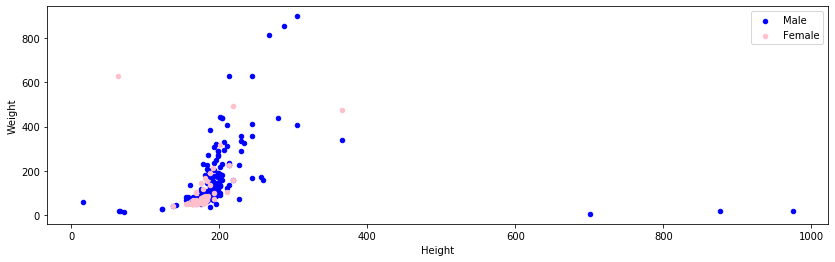

In [101]:
fig, ax = plt.subplots(figsize=(14,4))
male_df.plot.scatter('Height', 'Weight', 
                  c = 'blue',ax=ax);
female_df.plot.scatter('Height', 'Weight', 
                  c = 'pink',ax=ax);
ax.legend(['Male','Female'])


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [44]:
# male_heroes_df = merge_df[merge_df.Gender=='Male'].copy()
# female_heroes_df = merge_df[merge_df.Gender=='Female'].copy()

def show_distplot(dataframe, gender, column_name):
    gender_df = dataframe.loc[dataframe.Gender == gender].copy()
    sns.distplot(gender_df[column_name])

/usr/local/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


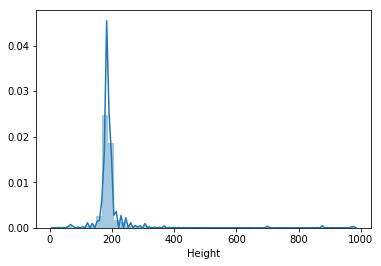

In [158]:
# Male Height
show_distplot(merge_df,'Male','Height')

/usr/local/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


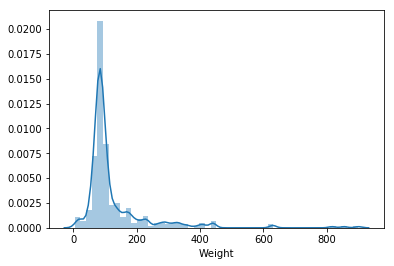

In [145]:
# Male Weight
show_distplot(merge_df,'Male','Weight')

/usr/local/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


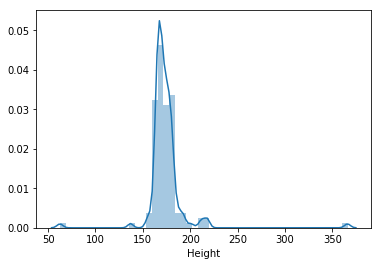

In [147]:
# Female Height
show_distplot(merge_df,'Female','Height')

/usr/local/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


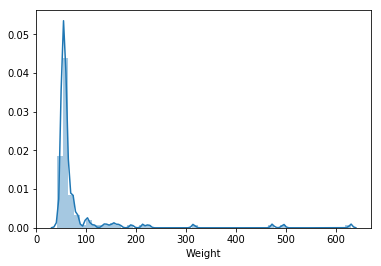

In [148]:
# Female Weight
show_distplot(merge_df,'Female','Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [109]:
powers_df.sum(numeric_only=True).sort_values(ascending=False).head(5)

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [137]:
merge_df[powers_df.columns][merge_df.Publisher == 'Marvel Comics'] \
        .sum(numeric_only=True) \
        .sort_values(ascending=False) \
        .head(7)

Super Strength    177
Stamina           139
Durability        136
Super Speed       119
Agility           114
Flight             91
Reflexes           90
dtype: int64

In [138]:
merge_df[powers_df.columns][merge_df.Publisher == 'DC Comics'] \
        .sum(numeric_only=True) \
        .sort_values(ascending=False) \
        .head(7)

Super Strength    73
Stamina           63
Flight            59
Super Speed       58
Agility           55
Durability        54
Intelligence      47
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
_Both Marvel and DC have Super Strength and Stamina as their top powers, and Super Speed and Agility as the 4th and 5th highest. However, Flight is the third most common power in DC Comics, whereas Durability is Marvel's. Overall trends match the Marvel matchup, which makes sense since there are many more Marvel heroes in the database than DC. _


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [119]:
merge_df[merge_df.Race == 'Alien']

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,Ardina,...,False,False,False,False,False,False,False,False,False,False
Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,default,NaN,88.0,Blackwulf,...,False,False,False,False,False,False,False,False,False,False
Century,Male,white,Alien,White,201.0,Marvel Comics,grey,good,97.0,Century,...,False,False,False,False,False,False,False,False,False,False
Doomsday,Male,red,Alien,White,244.0,DC Comics,default,bad,412.0,Doomsday,...,False,False,False,False,False,False,False,False,False,False
Evilhawk,Male,red,Alien,Black,191.0,Marvel Comics,green,bad,106.0,Evilhawk,...,False,False,False,False,False,False,False,False,False,False
Silver Surfer,Male,white,Alien,No Hair,193.0,Marvel Comics,silver,good,101.0,Silver Surfer,...,False,False,False,False,False,False,False,False,False,False


In [128]:
heroes_df[~heroes_df.Race.isin(["Human","Mutant","Human / Radiation"])].Race.value_counts()

God / Eternal         14
Cyborg                11
Android                9
Symbiote               9
Kryptonian             7
Alien                  7
Demon                  6
Asgardian              5
Atlantean              5
Alpha                  5
Inhuman                4
Animal                 4
Cosmic Entity          4
Human / Altered        3
New God                3
Human / Cosmic         2
Saiyan                 2
Human-Kree             2
Demi-God               2
Eternal                2
Amazon                 2
Vampire                2
Metahuman              2
Frost Giant            2
Strontian              1
Spartoi                1
Human-Vulcan           1
Zen-Whoberian          1
Planet                 1
Ungaran                1
Icthyo Sapien          1
Zombie                 1
Talokite               1
Bizarro                1
Kaiju                  1
Czarnian               1
Kakarantharaian        1
Human-Spartoi          1
Neyaphem               1
Human-Vuldarian        1


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data